In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as oj
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

In [42]:
root_folder = r'/Users/yang/Documents/Wilbrecht_Lab/sleap_video/cleaned_preprocessed_data'
combined_df = pd.read_csv(oj(root_folder, 'combined_df.csv'))

In [43]:
print(combined_df.shape)
combined_df.head()

(837305, 39)


,index,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,...,Head velocity,Neck velocity,Torso velocity,Tailhead velocity,Head acceleration,Neck acceleration,Torso acceleration,Tailhead acceleration,animal,session
0,0,97.949959,125.948250,90.718018,125.915596,78.312035,126.051994,68.342316,123.691650,297.271604,...,0.000000,0.000000,0.000000,0.000000,5366.158657,6103.448865,6087.064396,4976.537731,RRM028,Day136
1,1,103.294258,126.465607,98.100525,126.174385,85.752670,125.916733,74.097397,125.736877,297.810956,...,178.871955,203.448296,202.902147,165.884591,444.021472,-256.515885,-354.946138,101.096186,RRM028,Day136
2,2,111.046303,126.946213,105.955849,126.559837,93.239532,126.049316,80.696983,125.685104,298.240149,...,193.672671,194.897766,191.070609,169.254464,254.476626,-326.058207,-326.396008,351.326716,RRM028,Day136
3,3,118.300751,127.073494,111.140808,126.629097,98.491478,126.034889,86.217712,123.775703,298.339819,...,202.155225,184.029159,180.190742,180.965354,-47.854098,502.099255,716.147302,995.369931,RRM028,Day136
4,4,126.184807,126.752533,119.117012,126.511871,106.560745,126.113716,94.671455,125.946205,298.074981,...,200.560089,200.765801,204.062318,214.144352,-242.376663,267.522220,322.237925,183.658880,RRM028,Day136


(array([3.39387e+05, 8.99850e+04, 6.66150e+04, 5.20860e+04, 4.04870e+04,
        3.22160e+04, 3.14660e+04, 3.13630e+04, 3.08780e+04, 2.83190e+04,
        2.74430e+04, 2.02020e+04, 1.48670e+04, 9.99800e+03, 4.86500e+03,
        2.42400e+03, 1.50900e+03, 8.38000e+02, 6.67000e+02, 5.92000e+02,
        4.79000e+02, 4.57000e+02, 4.41000e+02, 3.78000e+02, 2.57000e+02,
        2.11000e+02, 1.75000e+02, 1.57000e+02, 1.38000e+02, 1.03000e+02]),
 array([  0.        ,  16.66666667,  33.33333333,  50.        ,
         66.66666667,  83.33333333, 100.        , 116.66666667,
        133.33333333, 150.        , 166.66666667, 183.33333333,
        200.        , 216.66666667, 233.33333333, 250.        ,
        266.66666667, 283.33333333, 300.        , 316.66666667,
        333.33333333, 350.        , 366.66666667, 383.33333333,
        400.        , 416.66666667, 433.33333333, 450.        ,
        466.66666667, 483.33333333, 500.        ]),
 <BarContainer object of 30 artists>)

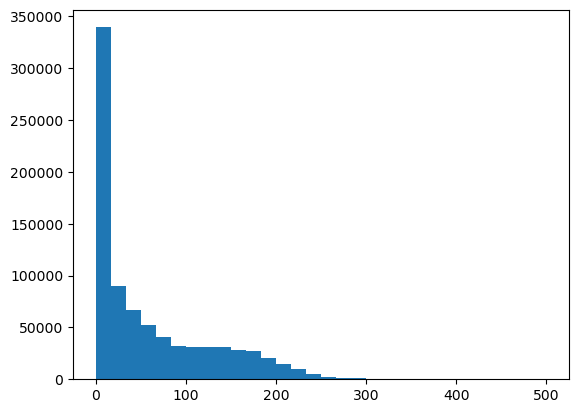

In [44]:
plt.hist(combined_df['Head velocity'], bins=30, range=(0, 500))

In [51]:
def plot_assigned_tracks(df, condition_func):
    '''
    Plot the trials that satisfy the given condition
    '''
    current_trial_num = np.nan
    current_bonsai_decision = np.nan
    current_decision = np.nan
    bonsai_decision = np.nan
    decision = np.nan
    sum_of_speed = 0
    speed_count = 0
    
    #bonsai_decision_list = []
    #decision_list = []
    straight_walking_speed_list =[]
    animal_list = []
    session_list = []
    trial_list = []

    for index, row in df.iterrows():
        bonsai_decision = row['label']
        decision = row['decision']
        trial_num = row['trial']
        animal = row['animal']
        session = row['session']
        speed = row['Head velocity']
        
        
        if trial_num != current_trial_num: # End of current trial and start of a new trial
            if speed_count != 0:
                average_speed = sum_of_speed/speed_count
            else:
                average_speed = np.nan
            
            if current_bonsai_decision == 'collection':
                current_bonsai_decision = 'ACC'
            if  condition_func(current_decision, current_bonsai_decision, average_speed): # ---MODIFY THE CONDITION HERE---
                #bonsai_decision_list.append(current_bonsai_decision)
                #decision_list.append(current_decision)
                straight_walking_speed_list.append(average_speed)
                animal_list.append(animal)
                session_list.append(session)
                trial_list.append(current_trial_num)
            
            current_bonsai_decision = np.nan    
            current_decision = np.nan
            current_trial_num = trial_num 
            sum_of_speed = 0
            speed_count = 0
              
        if not pd.isna(decision):
            current_decision = decision    
        if not pd.isna(bonsai_decision):
            current_bonsai_decision = bonsai_decision
            
        if pd.isna(current_decision) and (speed < 300):
            sum_of_speed += speed
            speed_count += 1
    
    result_df = pd.DataFrame({
        #'bonsai decision': bonsai_decision_list,
        #'decision': decision_list,
        'straight_walking_speed': straight_walking_speed_list,
        'animal': animal_list,
        'session': session_list,
        'trial': trial_list
    })
    plt.hist(straight_walking_speed_list, bins=50)
    plt.show()
    # Extract animal, session, and trial info from the decision dataframe
    decision_info = result_df[['animal', 'session', 'trial']]
    filtered_df = df[
        df[['animal', 'session', 'trial']].apply(tuple, axis=1).isin(decision_info.apply(tuple, axis=1))
    ]

    # plot each trial separately
    plt.figure(figsize=(10, 10))

    palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

    for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
        sns.lineplot(
            data=group,
            x='warped Head x',
            y='warped Head y',
            color=color,
            linewidth=0.5,
            legend=False,
            sort=False
        )

    plt.axvline(x=282, color='red', linestyle='--', linewidth=1)
    plt.text(285, 142, 'REJ', color='red', ha='right', va='top')

    plt.axvline(x=309, color='red', linestyle='--', linewidth=1)
    plt.text(314, 142, 'ACC', color='red', ha='right', va='top')
    
    plt.axhline(y=46, color='red', linestyle='--', linewidth=1)
    plt.text(plt.xlim()[1], 46, 'T_Entry', color='red', ha='right', va='bottom')


    plt.ylim(0, 140)
    plt.xlabel('Head x coordinate')
    plt.ylabel('Head y coordinate')
    plt.title(f'Track of Head of length: {len(df)}')
    plt.legend(title='Trial Number', loc='upper right')
    plt.grid(True)

    # Invert y-axis to match the video coordinate system
    plt.gca().invert_yaxis()

    plt.show()
    

def interactive_analysis(combined_df, condition_func):
    """
    Use the slider to adjust the start and length of the range of combined_df.
    Then plot the trials that satisfy the given condition
    
    Parameters:
    - combined_df: The DataFrame to analyze.
    - condition_func: A lambda function to determine the condition for plotting.
    """
    
    # Function to update the selected range based on slider values
    def update_range(range_value, interval):
        global selected_range
        global df_subset
        selected_range = [range_value, range_value + interval]
        df_subset = combined_df.iloc[selected_range[0]:selected_range[1]]
        print(f"Selected range: {selected_range}")

    # Create slider widgets
    range_slider = widgets.IntSlider(value=0, min=0, max=len(combined_df), step=100, description='Start:')
    interval_slider = widgets.IntSlider(value=10000, min=0, max=len(combined_df), step=100, description='Length:')
    interactive_widget = widgets.interactive(update_range, range_value=range_slider, interval=interval_slider)
    display(interactive_widget)

    # Create an output widget for the plots
    output = widgets.Output()

    # Button to trigger further analysis
    analyze_button = widgets.Button(description="Plot")

    # Function to handle button click
    def on_analyze_button_clicked(b):
        with output:
            clear_output(wait=True)  # Clear previous plots
            plot_assigned_tracks(df_subset, condition_func)
    

    # Link the button to the handler function
    analyze_button.on_click(on_analyze_button_clicked)

    # Display the button and output widget
    display(analyze_button)
    display(output)
    